In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Chapter 1: Signals and Systems


*Signal* - set of data or information

*System* - entity that performs some operation on a signal, returning another signal

### S1.1 Size of a Signal

*Signal Energy* is a measure of signal size and is calculated as follows for a real signal:

$$
E_x = \int_{-\infty}^{\infty}{x^2(t)\,dt}
$$

and as follows for a complex signal, where the difference involves taking the magnitude:

$$
E_x = \int_{-\infty}^{\infty}{\left|x(t)\right|^2\,dt}
$$


*Signal Power* is a more appropriate measure of signal size when the energy integral does not converge. In this case we take the time-average of the energy. For a real signal:

$$
P_x = \lim_{T\to\infty}\frac{1}{T}\int_{-T/2}^{T/2}{x^2(t)\,dt}
$$

For a complex signal we take the magnitude

$$
P_x = \lim_{T\to\infty}\frac{1}{T}\int_{-T/2}^{T/2}{\left|x(t)\right|^2,dt}
$$

The *signal power* is the *mean-squared* value of the signal $x(t)$.
It is therefore straightforwardly related to the RMS value of $x(t)$:

$$
RMS = \sqrt{P_x}
$$

**Further Notes** 
1. A signal cannot be both an energy and power signal. A power signal is one whose energy is infinite and an energy signal is one whose power is infinite.
2. Signal power for a periodic signal can be found by evaluating over one signal period.

**Example 1.2a**

Note that $T = \frac{2 \pi}{\omega_0}$

\begin{align}
P_x &= \frac{1}{T}\int_0^T{\{C\cos(\omega_0t + \theta)\}^2}\,dt \\
&= \frac{1}{T}\int_0^T{C^2\cos^2(\omega_0t + \theta)}\,dt \\
&= \frac{C^2}{2T}\int_0^T{\left(cos(2\omega_0t+2\theta)+1\right)}\,dt \\
&= \frac{C^2}{2} + \frac{C^2}{2T}\int_0^T{cos(2\omega_0t+2\theta)}\,dt \\
&= \frac{C^2}{2}
\end{align}

And hence,

$$
RMS = \sqrt{P_x} = \sqrt{\frac{C^2}{2}} = \frac{C}{\sqrt{2}}
$$

Thus, a sinusoid of amplitude C has a power of $\frac{C^2}{2}$ regardless of non-zero frequency.

**Example 1.2b**

The power of the sum of two sinusoids equals the sum of the powers of individual sinusoids, as long as the frequencies are not equal, as two sinusoids of different frequency are orthogonal in function space (ie the cross product term is zero).

### S1.2 Signal Operations

**Shift** a signal by T: $x(t+T)$ delays the signal by T (rightward shift) while $x(t-T)$ advances the signal by T (leftward shift)
    
**Scale** a signal by k: $x(kt)$ compresses the signal in time (alternatively, expands time axis) while $x(t/k)$ stretches the signal in time (compresses the time axis)

**Time Reversal**, about the vertical axis: $p(t) = x(-t)$

**Horizontal reversal**, about the vertical axis: $p(t) = -x(t)$

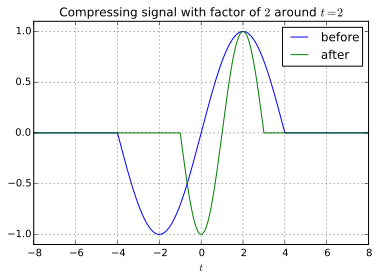

In [2]:
t = linspace(-8,8,1000)
y = lambda t: sin(pi/4*t) * (abs(t) < 4)
k = 2
a = 2
plot(t, y(t), label='before')
plot(t, y(k*(t-a)+a), label='after')
legend()
axis([-8, 8, -1.1, 1.1])
grid()
xlabel('$t$')
title('Compressing signal with factor of $%d$ around $t=%d$' % (k, a))

### S1.4 Some Useful Signal Models

In [6]:
def u(t):
    return 1.0 * t > 0

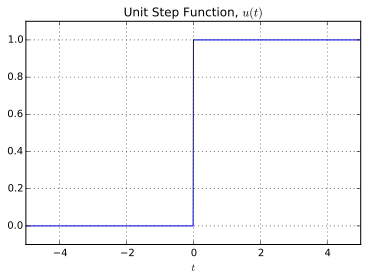

In [10]:
t = linspace(-5, 5, 1000)
plot(t, u(t))
axis([-5, 5, -0.1, 1.1])
grid()
xlabel('$t$')
title('Unit Step Function, $u(t)$')

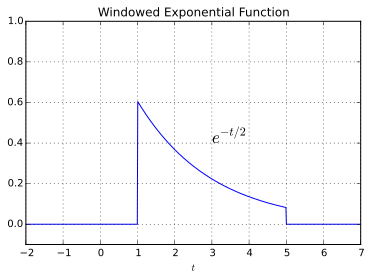

In [11]:
def step(t, start, end):
    return logical_and(t >= start, t < end)

t = linspace(-3, 10, 1000)
x = exp(-t/2) * step(t, 1, 5)
plot(t, x)
axis([-2, 7, -0.1, 1])
annotate(r'$e^{-t/2}$', xy=(3, 0.4), fontsize='xx-large')
grid()
xlabel('$t$')
title('Windowed Exponential Function')

The *exponential function* is a common signal model more frequently seen as $e^{st}$, where $s$ is typically complex and given by $s=\sigma + j\omega$

\begin{align}
e^{st} &= e^{\sigma t}e^{j\omega t} \\
&= e^{\sigma t}[\cos\omega t + j\sin\omega t]
\end{align}

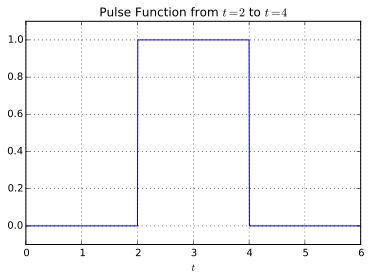

In [13]:
t = linspace(0, 6, 1000)
x = u(t-2) - u(t-4)
plot(t, x)
axis([0, 6, -0.1, 1.1])
grid()
xlabel('$t$')
title(r'Pulse Function from $t=2$ to $t=4$')

In general, a pulse of height $C$ starting at $t=a$ and ending at $t=b$ can be written as:

$$
x(t) = C\left[u(t-a)-u(t-b)\right]
$$

This is a very convenient expression to write piecewise defined functions in a closed form.

Multiplying a signal $x(t)$ with a pulse function has the effect of *widowing* the signal.

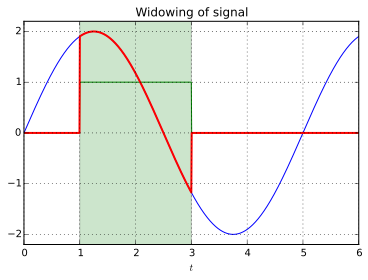

In [14]:
t = linspace(0, 7, 1000)
x = 2 * sin(2*pi/5*t)
a=1
b=3
window = u(t-a)-u(t-b)
x_w = x * window
plot(t, x, 'b', label='original signal')
plot(t, window, 'g', label='window')
plot(t, x_w, 'r', label='windowed signal', linewidth=2)
axvspan(a, b, facecolor='g', alpha=0.2)
axis([0, 6, -2.2, 2.2])
grid()
xlabel('$t$')
title('Widowing of signal')

In [15]:
def impulse(t, y=1, **kwargs):
    annotate('', xy=(t, y), xytext=(t, 0),
             arrowprops=dict(facecolor='black',
                             headwidth=5,
                             width=1,
                             shrink=0.0), **kwargs)

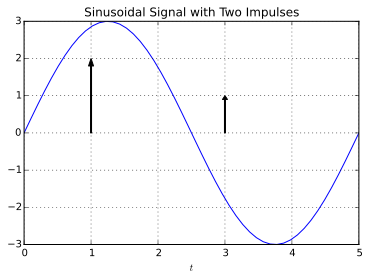

In [17]:
t = linspace(0, 5)
y = 3*sin(2*pi/5*t)
plot(t, y)
impulse(1, 2)
impulse(3)
grid()
xlim(0)
xlabel('$t$')
title('Sinusoidal Signal with Two Impulses')

Integrating the area under the curve of the product of a continous signal $f(t)$ and the unit impulse function at $t=T$, $\delta(t-T)$, yields:

$$
\int_{-\infty}^\infty{f(t)\delta(t-T)\,dt} = f(T)
$$

This is known as *sampling property* or *sifting property* of the unit impulse function, and will serve as a critical basis for bridging continous and discrete time signal analysis.

The unit impulse is best thought of as a *generalized function* - functions that are defined based on *its effect on other functions*. It is precisely the above sifting property that is used to define the unit impulse as a generalized function. This means that the behavior of the unit impulse is only well defined within an integral.

**Even and Odd Functions**

An *even function* is such that $x_e(t)$ = $x_e(-t)$

An *odd function* is such that  $x_o(t)$ = $-x_o(t)$

Some important properties of even and odd functions are as follows:

    1. Even * Odd = Odd
    2. Odd * Odd = Even
    3. Even * Even = Even
    
$$
\int_{-a}^a{x_e(t)\,dt} = 2\int_0^a{x_e(t)\,dt}
$$

$$
\int_{-a}^a{x_o(t)\,dt} = 0
$$

### S1.6 Systems

A physical system consists of interconnected components characterized by their terminal (IO) relationships and laws of interconnection. 

### S1.7 Classification of Systems

**Linearity** entails the *superposition principle*: *homogeneity* (scaling) and *additivity*

The **decomposition property** of linear systems states that the response of such a system is the sum of two components:

    total response = zero-input response + zero-state response
    
The *zero-input response* results from the initial conditions at time $t=0$ with the input $x(t)$ set to zero for all $t\geq0$, while the *zero-state response* results from the input $x(t)$ while initial conditions are assumed to be zero.

A *causal* system is one whose response to input at time $t$ depends only on the input $x(t)$ for $t\leq t_o$

### S1.10 Internal System Description: State-Space Description

In this approach, certain variables called *state variables* are identified, linear combinations of which can represent any possible signal in the system.

To complete our description of a given system we need two sets of equations, the *state equations*, which can be solved for the state variables, and the *output equations*.